# Data Exploration

In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [248]:
test = np.load("./Data/test_images.npy")
test.shape

(10000, 28, 28)

In [249]:
train = np.load("./Data/train_images.npy")
train.shape

(60000, 28, 28)

In [250]:
labels = pd.read_csv("./Data/train_labels.csv")
labels.shape

(60000, 1)

In [251]:
train_X = train[:50000]
test_X = train[50000:]
train_y = labels[:50000].to_numpy()
test_y = labels[50000:].to_numpy()

Text(0.5, 1.0, 'Data Distribution')

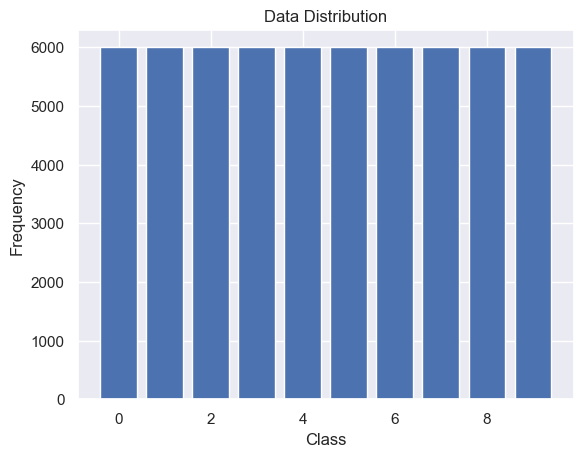

In [257]:
classes, frequency = np.unique(labels, return_counts=True)
plt.bar(classes, frequency)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Data Distribution")

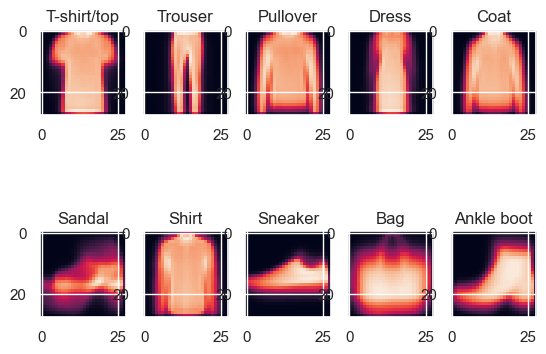

In [258]:
fig, axs = plt.subplots(2, 5)
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
meanImg = [train[labels.label.values == k].mean(axis=0).reshape(28,28) for k in range(10)]
for i in range(2):
    for j in range(5):
        axs[i][j].set_title(classes[5*i+j])
        axs[i][j].imshow(meanImg[5*i+j])

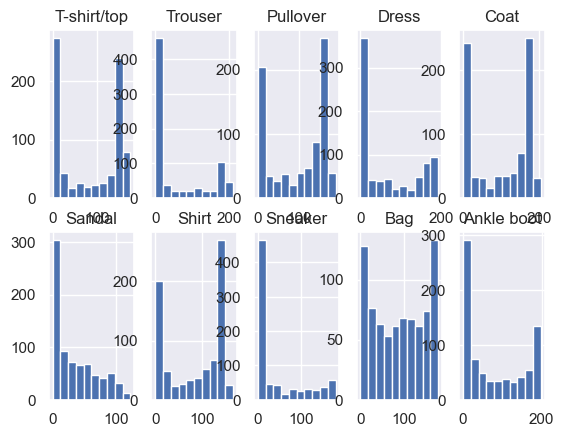

In [271]:
fig, axs = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        axs[i][j].set_title(label[5*i+j])
        lst = meanImg[5*i+j].flatten()
        axs[i][j].hist(lst)

Extra Analysis

In [ ]:
data = train / 255.0
target = labels
data.shape

In [292]:
import umap

embedding = umap.UMAP().fit_transform(data, y=target)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

ValueError: 'c' argument has 7840000 elements, which is inconsistent with 'x' and 'y' with size 28.

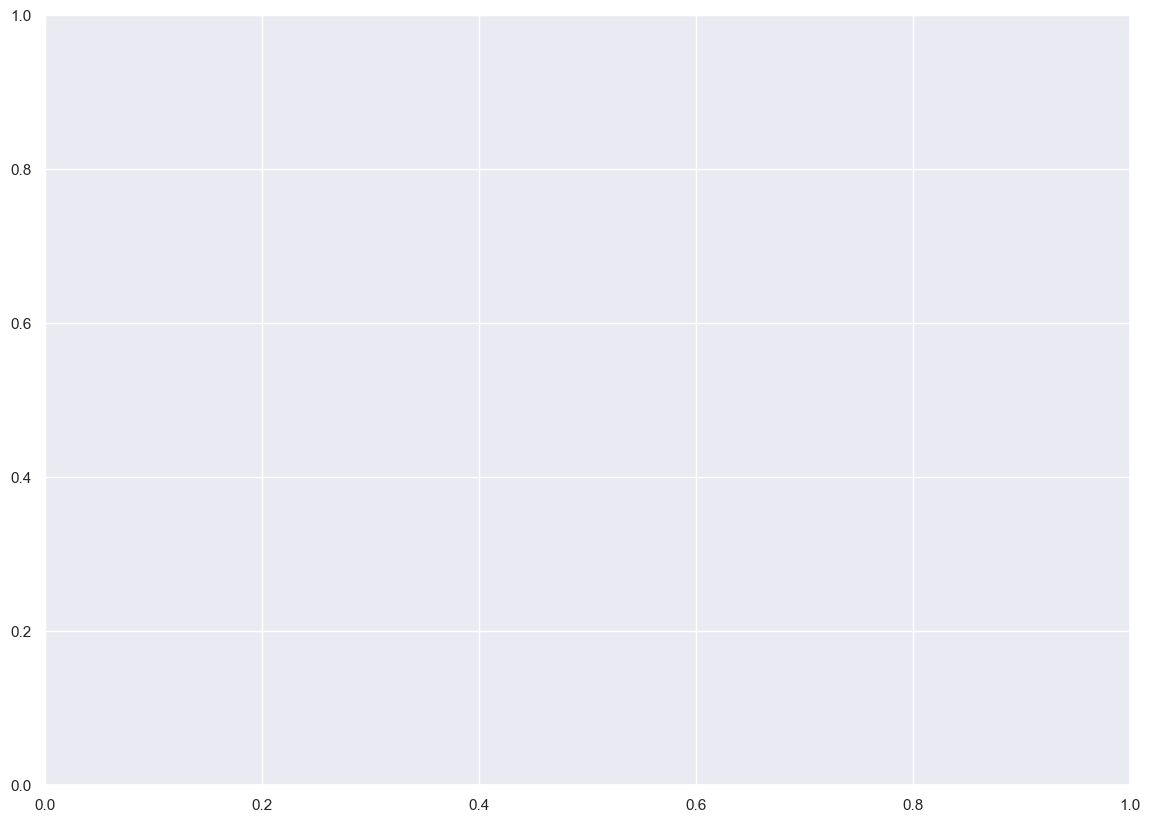

In [276]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP using Labels');

# Model Exploration

In [148]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

In [210]:
y_sparse_train = [[0 if train_y[i]!=j else 1 for j in range(len(label))] for i in range(len(train_y))]
y_sparse_train = np.array(y_sparse_train)
y_sparse_test = [[0 if test_y[i]!=j else 1 for j in range(len(label))] for i in range(len(test_y))]
y_sparse_test = np.array(y_sparse_test)

Base model

In [211]:
model =  Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [212]:
model.compile(loss = "categorical_crossentropy", optimizer=SGD(learning_rate=0.0001), metrics=["accuracy"])

In [213]:
history = model.fit(x= train_X, y = y_sparse_train, validation_data=(test_X, y_sparse_test), batch_size = 32, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 4s 2ms/step - loss: 26.0664 - accuracy: 0.7127 - val_loss: 16.9465 - val_accuracy: 0.7727
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 17.9126 - accuracy: 0.7708 - val_loss: 18.1149 - val_accuracy: 0.7401
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 16.6871 - accuracy: 0.7828 - val_loss: 35.2955 - val_accuracy: 0.7038
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 15.8486 - accuracy: 0.7897 - val_loss: 12.3067 - val_accuracy: 0.7969
Epoch 5/20
1563/1563 [==============================] - 4s 2ms/step - loss: 15.7567 - accuracy: 0.7921 - val_loss: 14.1238 - val_accuracy: 0.7799
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 15.1697 - accuracy: 0.7944 - val_loss: 42.0482 - val_accuracy: 0.6354
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 15.0553 - accuracy: 0.7969 - val_loss: 21.0672 -

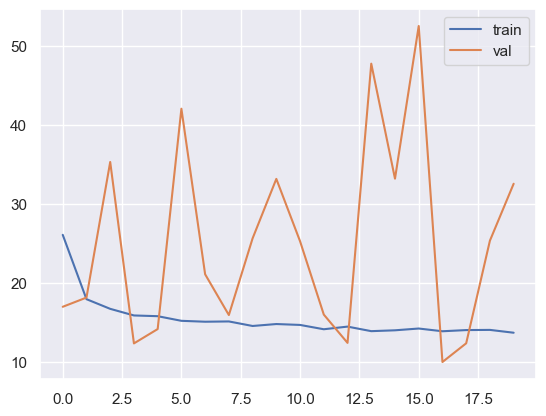

In [214]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.show()

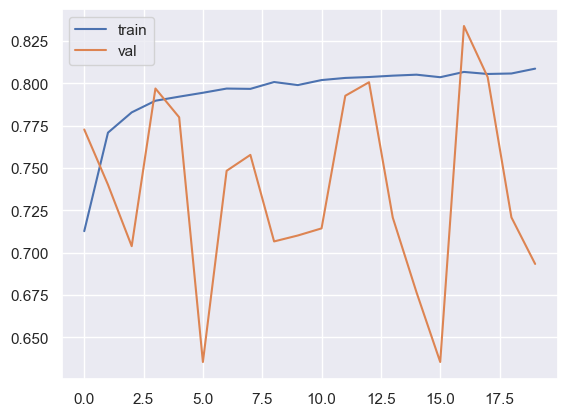

In [215]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()